# Speed Dating with Tinder

## Goals 🎯
The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**. 

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

This project is in two parts. A first part of exploratory data analysis, in order to get a better understanding of the sample demographic that we are studying. All visualizations will be done using the matplotlib library. The second part will take a closer look on the matches between participants, in order to see what influences them or not. These plots will be done with the seaborn and plotly library. 

### I. EDA : a better understanding of who uses Tinder (using matplotlib library)

This first part is dedicated to a better understanding of the population we are studying. 


#### 0. Dataset reduction

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

In [3]:
# Import de data and description

data = pd.read_csv("data/Speed+Dating+data.csv", encoding = "ISO-8859-1")
print(f"This data has {data.shape[0]} entries, each entry corresponds to a date between two participants, \nand {data.shape[1]} columns.")
print(data.head())
data.describe(include = 'all')

This data has 8378 entries, each entry corresponds to a date between two participants, 
and 195 columns.
   iid   id  gender  idg  condtn  wave  round  position  positin1  order  ...  \
0    1  1.0       0    1       1     1     10         7       NaN      4  ...   
1    1  1.0       0    1       1     1     10         7       NaN      3  ...   
2    1  1.0       0    1       1     1     10         7       NaN     10  ...   
3    1  1.0       0    1       1     1     10         7       NaN      5  ...   
4    1  1.0       0    1       1     1     10         7       NaN      7  ...   

   attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  sinc5_3  intel5_3  \
0      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
1      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
2      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
3      5.0      7.0       7.0     7.0     7.0      NaN      NaN       NaN   
4      5.0      7.0    

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


For now, we are only interested in the demography of people we are studying. 
We can reduce the dataframe :

    - in terms of rows : have a unique row for each participant
    - in terms of columns : only have the data of each participant

In [87]:
# iid designates unique participants
print(f"The iid designate a unique participant, and the max iid number is : {data['iid'].max()}.")
print(f"However, there are {data['iid'].nunique()} unique values of iid.")

#There is one missing value of iid ! 

The iid designate a unique participant, and the max iid number is : 552.
However, there are 551 unique values of iid.


In [88]:
# Detection of missing iid value 
# create a set of consecutive values from 1 to 552
consecutive_values = set(range(1, 553))

# create a set of values in the d2frame column
col_values = set(data['iid'])

# find the missing value(s)
missing_values = consecutive_values - col_values
missing_values

print(f"The iid {missing_values} is missing in the data, there are {data['iid'].max()-1} participants.")

The iid {118} is missing in the data, there are 551 participants.


In [89]:
# Creation of reduced d2 for EDA :
 
# Choice of columns
c = ['iid', 'gender', 'idg','age','field','field_cd','race',
 'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
 'attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1',
 'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1',
 'attr3_1','sinc3_1','fun3_1','intel3_1','amb3_1',
 'attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1']

#reducing the data to only these columns and unique participants
d1 = data[c]
d1 = d1.drop_duplicates(keep='first')
print(f"The d2 d1 has {d1.shape[0]} corresponding to each participant, and {d1.shape[1]} columns.")


The d2 d1 has 551 corresponding to each participant, and 35 columns.


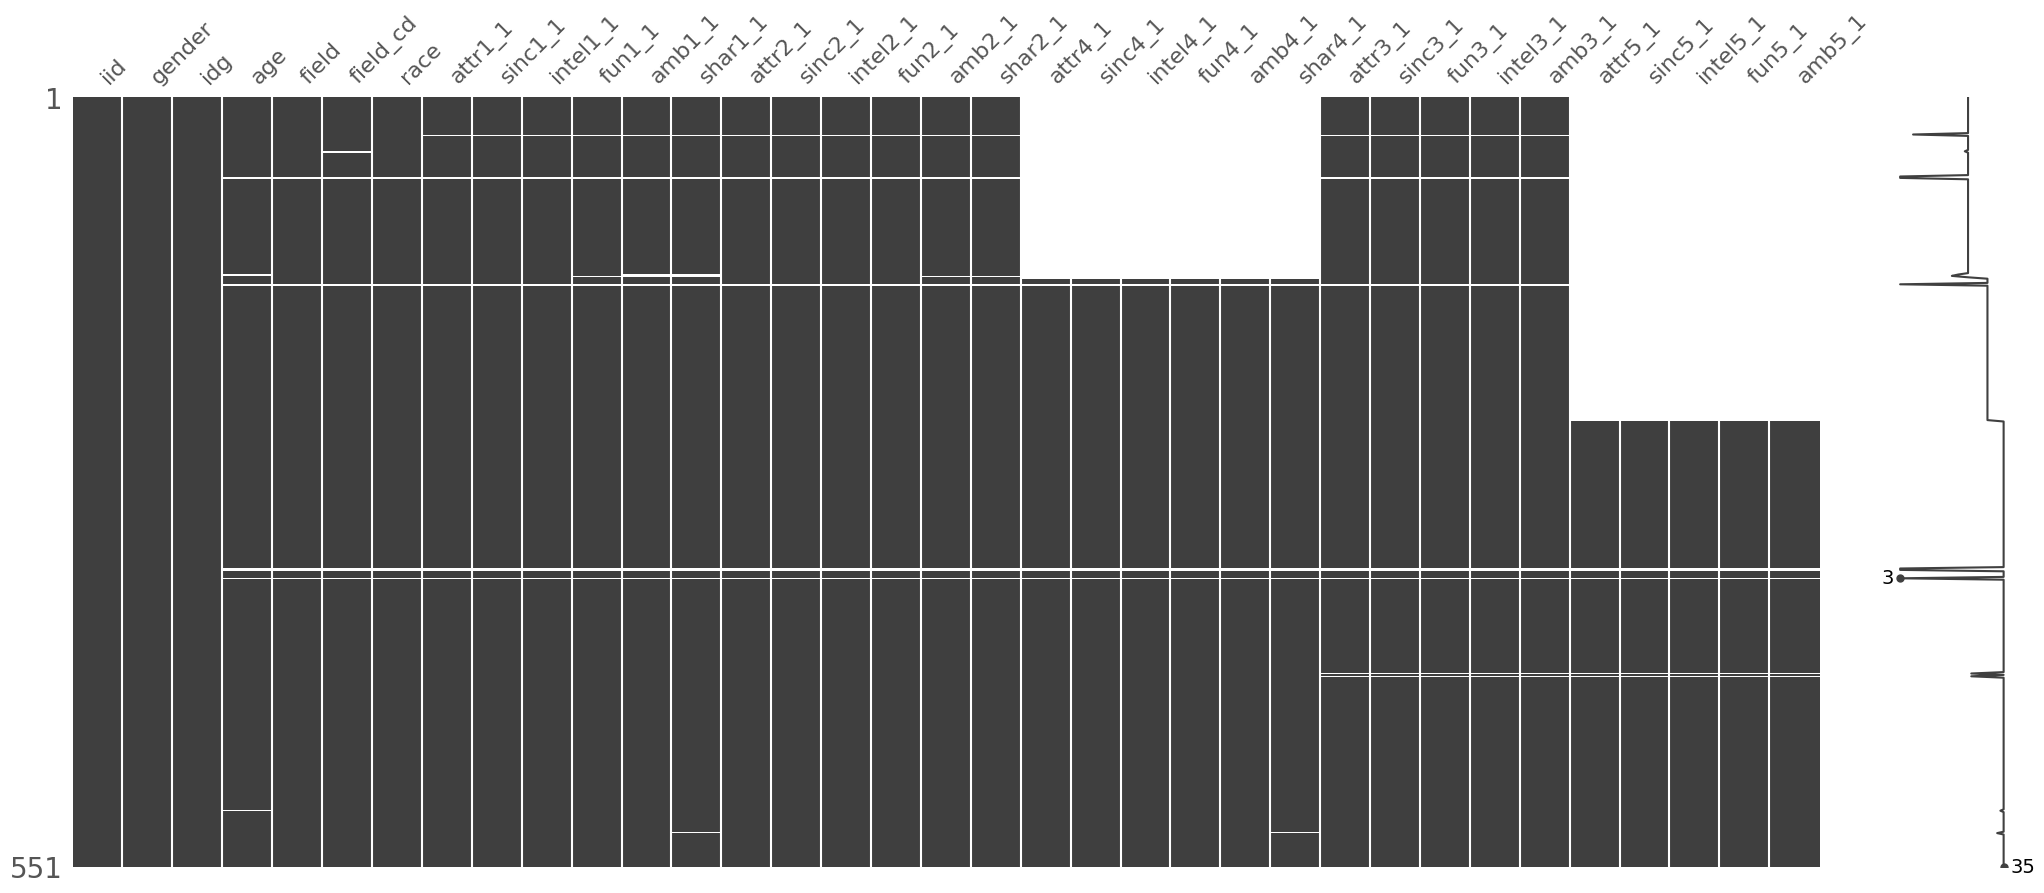

In [90]:
# Check missing values with a matrix visualization 
msno.matrix(d1)
plt.show()
#We'll deal with the missing values when these columns are needed below

From this graph, we can see that missing values depend on different forms that were filled by participants from different waves. We'll take this into account when those columns will be used.

#### 1. Gender and age distribution (histograms)

In [91]:
d1['gender']=d1['gender'].apply(lambda x : 'Female' if x == 0 else 'Male')
d1['gender'].value_counts(normalize=True)
# Half of the participants are men, other half are women.

gender
Male      0.502722
Female    0.497278
Name: proportion, dtype: float64

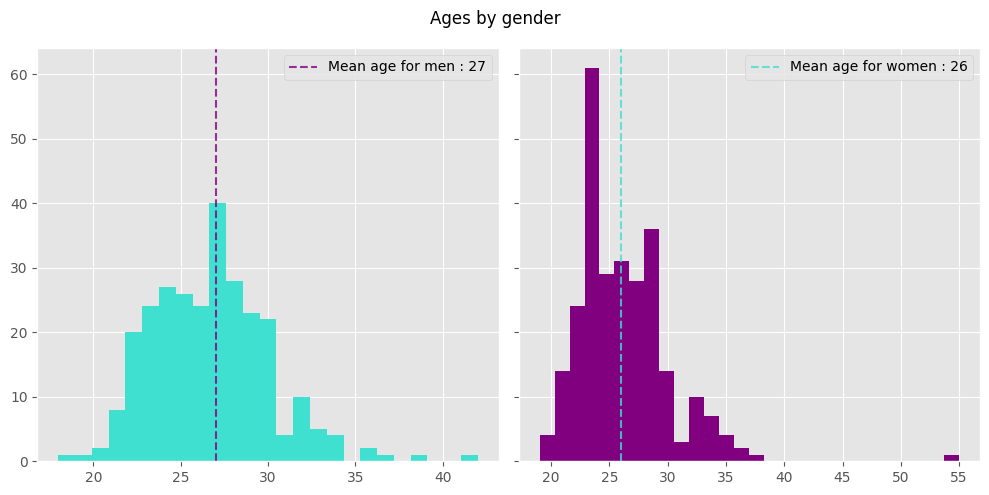

In [92]:
# let's explore the ages by gender

# mean age for each gender
mean_age_man = round(d1[d1['gender'] == 'Male']['age'].mean())
mean_age_woman = round(d1[d1['gender'] == 'Female']['age'].mean())

plt.style.use("ggplot")
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10, 5))

axs[0].hist(d1[d1['gender'] == 'Male']['age'], bins = 25, color = 'turquoise')
axs[1].hist(d1[d1['gender'] == 'Female']['age'], bins= 28, color = 'purple')
axs[0].axvline(mean_age_man , linestyle='--' , color='purple' , alpha=0.8 , label=f'Mean age for men : {mean_age_man}')
axs[1].axvline(mean_age_woman , linestyle='--' , color='turquoise' , alpha=0.8 , label=f'Mean age for women : {mean_age_woman}')
axs[0].legend()
axs[1].legend()
fig.suptitle('Ages by gender')

plt.show()

The general age distribution is quite similar between men and women : the majority participating in this study are between 20 and 35 years old. The mean age is 26 and 27 for both.

#### 2. Which fields of study are represented ? (nested pie charts)

In [93]:
d1['field_name'] = d1['field_cd'].apply(lambda x : "Law" if x == 1 else  \
                                                    "Math" if x==2 else \
                                                    "Social Science, Psychologist" if x == 3 else \
                                                    "Medical Science, Pharmaceuticals" if x==4 else \
                                                    "Engineering" if x == 5 else \
                                                    "English/Creative Writing/ Journalism" if x==6 else \
                                                    "History/Religion/Philosophy" if x==7 else \
                                                    "Business/Econ/Finance" if x==8 else \
                                                    "Education, Academia" if x==9 else \
                                                    "Biological Sciences/Chemistry/Physics" if x == 10 else \
                                                    "Social Work" if x==11 else \
                                                    "Undergrad/undecided" if x==12 else \
                                                    "Political Science/International Affairs" if x==13 else \
                                                    "Film" if x==14 else \
                                                    "Fine Arts/Arts Administration" if x==15 else \
                                                    "Languages" if x==16 else \
                                                    "Architecture" if x==17 else \
                                                    "Other")

d1['field_category'] = d1['field_name'].apply(lambda x : "Business and economics" if x in ["Business/Econ/Finance"] else 
                                                            "Politics & Law" if x in ["Political Science/International Affairs", 'Law'] else
                                                            "Social Sciences" if x in ["Social Science, Psychologist","English/Creative Writing/ Journalism","History/Religion/Philosophy","Education, Academia" , "Social Work"] else
                                                            "Science & Engineering" if x in ["Math","Medical Science, Pharmaceuticals", "Architecture", "Engineering","Biological Sciences/Chemistry/Physics"] else
                                                            "Arts and culture" if x in ["Film", "Fine Arts/Arts Administration","Languages",]
                                                            else "Other")


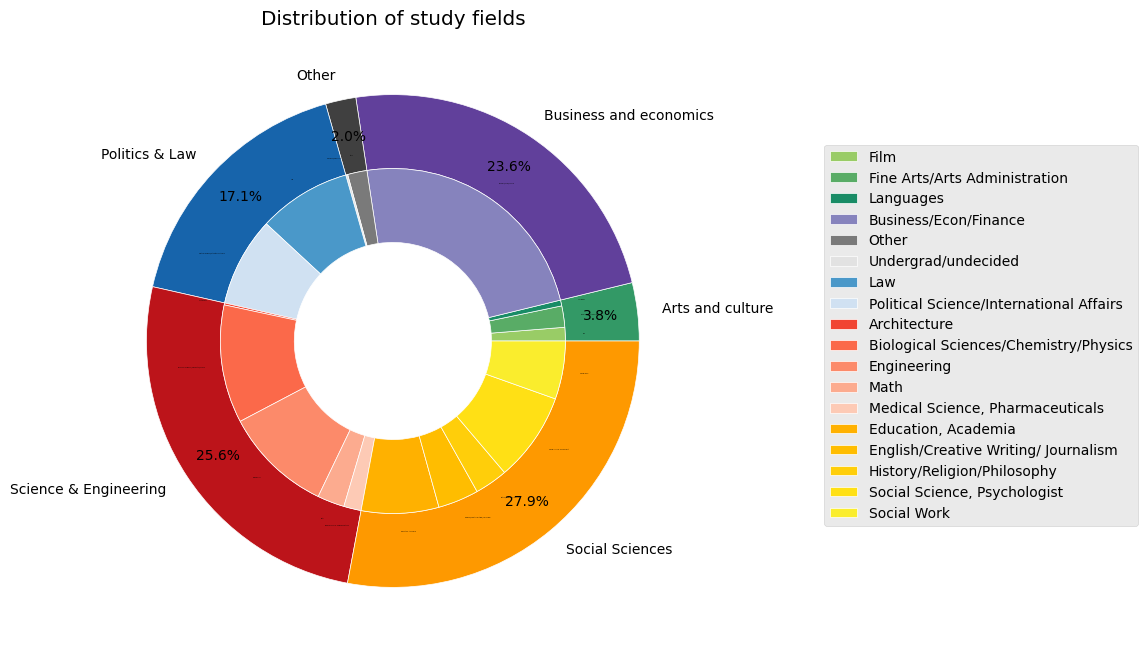

In [94]:
outer = d1.groupby('field_category')['iid'].count()
inner = d1.groupby(['field_category', 'field_name'])['field_name'].count()
inner_labels = inner.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(16,8))
size = 0.3

cmap1 = plt.cm.summer
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greys
cmap4 = plt.cm.Blues
cmap5 = plt.cm.Reds
cmap6 = plt.cm.Wistia

outer_colors = [cmap1(.2), cmap2(.8), cmap3(.8), cmap4(.8), cmap5(.8), cmap6(.8)]
inner_colors = [*cmap1(np.linspace(.6, .1, 3)),
                *cmap2(np.linspace(.6, .2, 1)),
                *cmap3(np.linspace(.6, .2, 2)),
                *cmap4(np.linspace(.6, .2, 2)),
                *cmap5(np.linspace(.6, .2, 5)),
                *cmap6(np.linspace(.6, .2, 5))]


ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors = outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       colors = inner_colors,
       labels = inner_labels,
       textprops={'fontsize': 0},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set( aspect="equal", title='Distribution of study fields')
plt.legend(inner_labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[6:], inner_labels, loc=(1.2, 0.2))

plt.show()

#### 3. Race distribution (pie charts)

In [95]:
d1['Race'] = d1['race'].apply(lambda x : "African" if x==1 else \
                                                    "Caucasian" if x ==2 else \
                                                    "Hispanic" if x==3 else \
                                                    "Asian" if x==4 else \
                                                    "Native American" if x==5 else \
                                                    "Other")

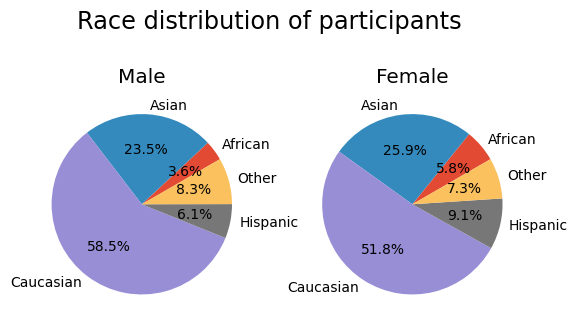

In [96]:
d1_race = d1.groupby('gender')['Race'].value_counts(sort=False).reset_index(name='size')

fig, axes = plt.subplots(1, 2)
axes[0].pie(d1_race[d1_race['gender']=='Male']['size'], labels=d1_race[d1_race['gender']=='Male']['Race'],autopct='%1.1f%%', startangle=30)
axes[0].set_title('Male')
axes[1].pie(d1_race[d1_race['gender']=='Female']['size'], labels=d1_race[d1_race['gender']=='Female']['Race'],autopct='%1.1f%%', startangle=30)
axes[1].set_title('Female')
plt.suptitle('Race distribution of participants', size="xx-large", y=0.9)
plt.show()

#### 4. What do people look for in the opposite gender ? (polar charts)

Let's now study what people look for in others, and what they think the opposite sex looks for. 

In [97]:
men_look_for = list(d1[d1['gender']=='Male'][['attr1_1' , 'sinc1_1' , 'intel1_1' , 'fun1_1' , 'amb1_1' , 'shar1_1']].mean().apply(lambda x : int(x)).values)
women_look_for = list(d1[d1['gender']=='Female'][['attr1_1' , 'sinc1_1' , 'intel1_1' , 'fun1_1' , 'amb1_1' , 'shar1_1']].mean().apply(lambda x : int(x)).values)
men_think_women_look_for = list(d1[d1['gender']=='Male'][['attr2_1' , 'sinc2_1' , 'intel2_1' , 'fun2_1' , 'amb2_1' , 'shar2_1']].mean().apply(lambda x : int(x)).values)
women_think_men_look_for = list(d1[d1['gender']=='Female'][['attr2_1' , 'sinc2_1' , 'intel2_1' , 'fun2_1' , 'amb2_1' , 'shar2_1']].mean().apply(lambda x : int(x)).values)
men_self_opinion = list(d1[d1['gender']=='Male'][['attr3_1' , 'sinc3_1' , 'intel3_1' , 'fun3_1' , 'amb3_1' ]].mean().apply(lambda x : int(x)).values)
women_self_opinion = list(d1[d1['gender']=='Female'][['attr3_1' , 'sinc3_1' , 'intel3_1' , 'fun3_1' , 'amb3_1' ]].mean().apply(lambda x : int(x)).values)
men_think_other_men_look_for = list(d1[d1['gender']=='Male'][['attr4_1' , 'sinc4_1' , 'intel4_1' , 'fun4_1' , 'amb4_1' , 'shar4_1']].mean().apply(lambda x : int(x)).values)
women_think_other_women_look_for = list(d1[d1['gender']=='Female'][['attr4_1' , 'sinc4_1' , 'intel4_1' , 'fun4_1' , 'amb4_1' , 'shar4_1']].mean().apply(lambda x : int(x)).values)
men_others_perception = list(d1[d1['gender']=='Male'][['attr5_1' , 'sinc5_1' , 'intel5_1' , 'fun5_1' , 'amb5_1' ]].mean().apply(lambda x : int(x)).values)
women_others_perception = list(d1[d1['gender']=='Female'][['attr5_1' , 'sinc5_1' , 'intel5_1' , 'fun5_1' , 'amb5_1' ]].mean().apply(lambda x : int(x)).values)

#in order to have the entire spectrum (la boucle est bouclée)
men_look_for.append(men_look_for[0])
women_look_for.append(women_look_for[0])
men_think_women_look_for.append(men_think_women_look_for[0])
women_think_men_look_for.append(women_think_men_look_for[0])
men_think_other_men_look_for.append(men_think_other_men_look_for[0])
women_think_other_women_look_for.append(women_think_other_women_look_for[0])

men_self_opinion.append(men_self_opinion[0])
women_self_opinion.append(women_self_opinion[0])
men_others_perception.append(men_others_perception[0])
women_others_perception.append(women_others_perception[0])

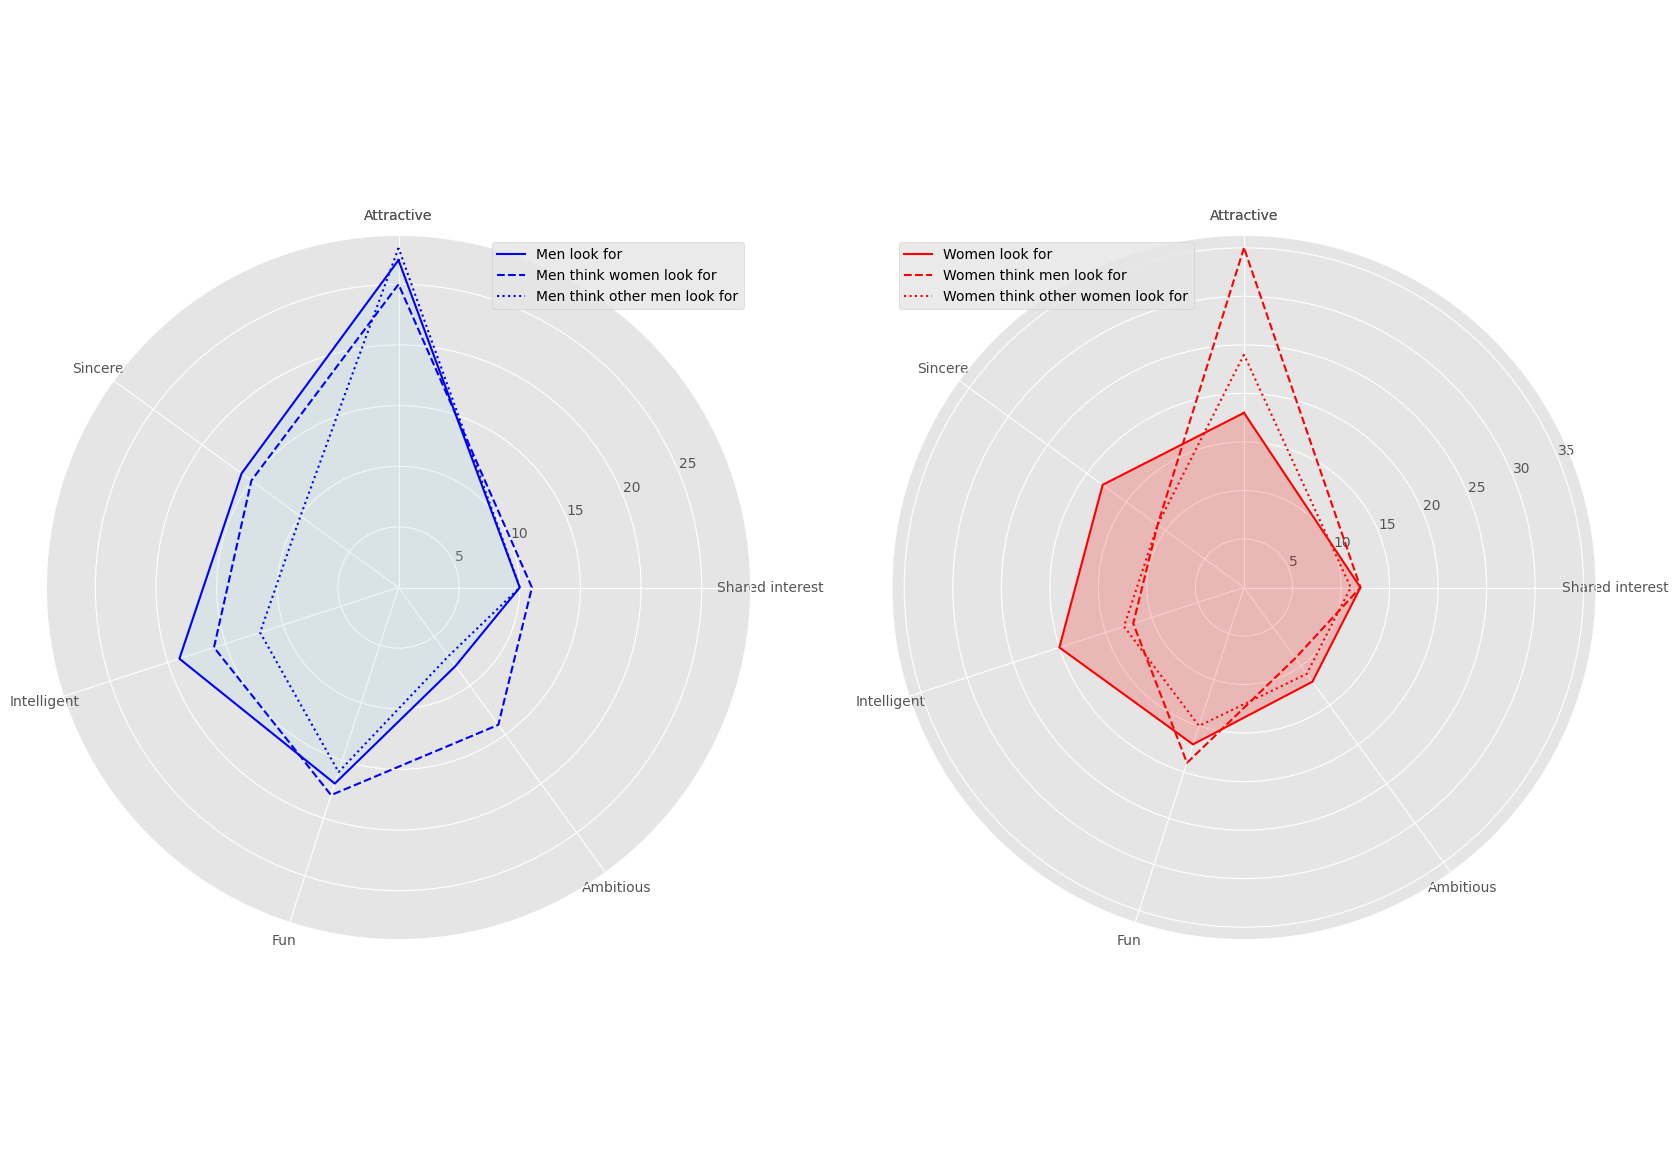

In [98]:
# Thetagrid
labels0 = ['Attractive' , 'Sincere', 'Intelligent' , 'Fun', 'Ambitious' , 'Shared interest' , 'Attractive']
label_pos = np.linspace(start=np.pi / 2, stop=2 * np.pi, num=6, endpoint=True)
label_pos = np.concatenate((label_pos, [label_pos[0]]))

fig, ax = plt.subplots(1,2, figsize=(20,15))
gs = GridSpec(1, 2)
ax[0].axis('off')
ax[0]= fig.add_subplot(gs[0,0], projection='polar')
ax[0].plot(label_pos, men_look_for, label='Men look for', color='blue')
ax[0].fill(label_pos, men_look_for, color='lightblue', alpha = 0.2)
ax[0].plot(label_pos, men_think_women_look_for, label='Men think women look for', color='blue', linestyle='dashed')
ax[0].plot(label_pos, men_think_other_men_look_for, label='Men think other men look for', color='blue', linestyle=':')
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=labels0)
plt.legend(loc='upper right')

ax[1].axis('off')
ax[1]= fig.add_subplot(gs[0,1], projection='polar')
ax[1].plot(label_pos, women_look_for, label='Women look for', color='red')
ax[1].fill(label_pos, women_look_for, color='red', alpha = 0.2)
ax[1].plot(label_pos, women_think_men_look_for, label='Women think men look for', color='red', linestyle='dashed')
ax[1].plot(label_pos, women_think_other_women_look_for, label='Women think other women look for', color='red', linestyle=':')
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=labels0)
plt.legend(loc='upper left')
plt.show()

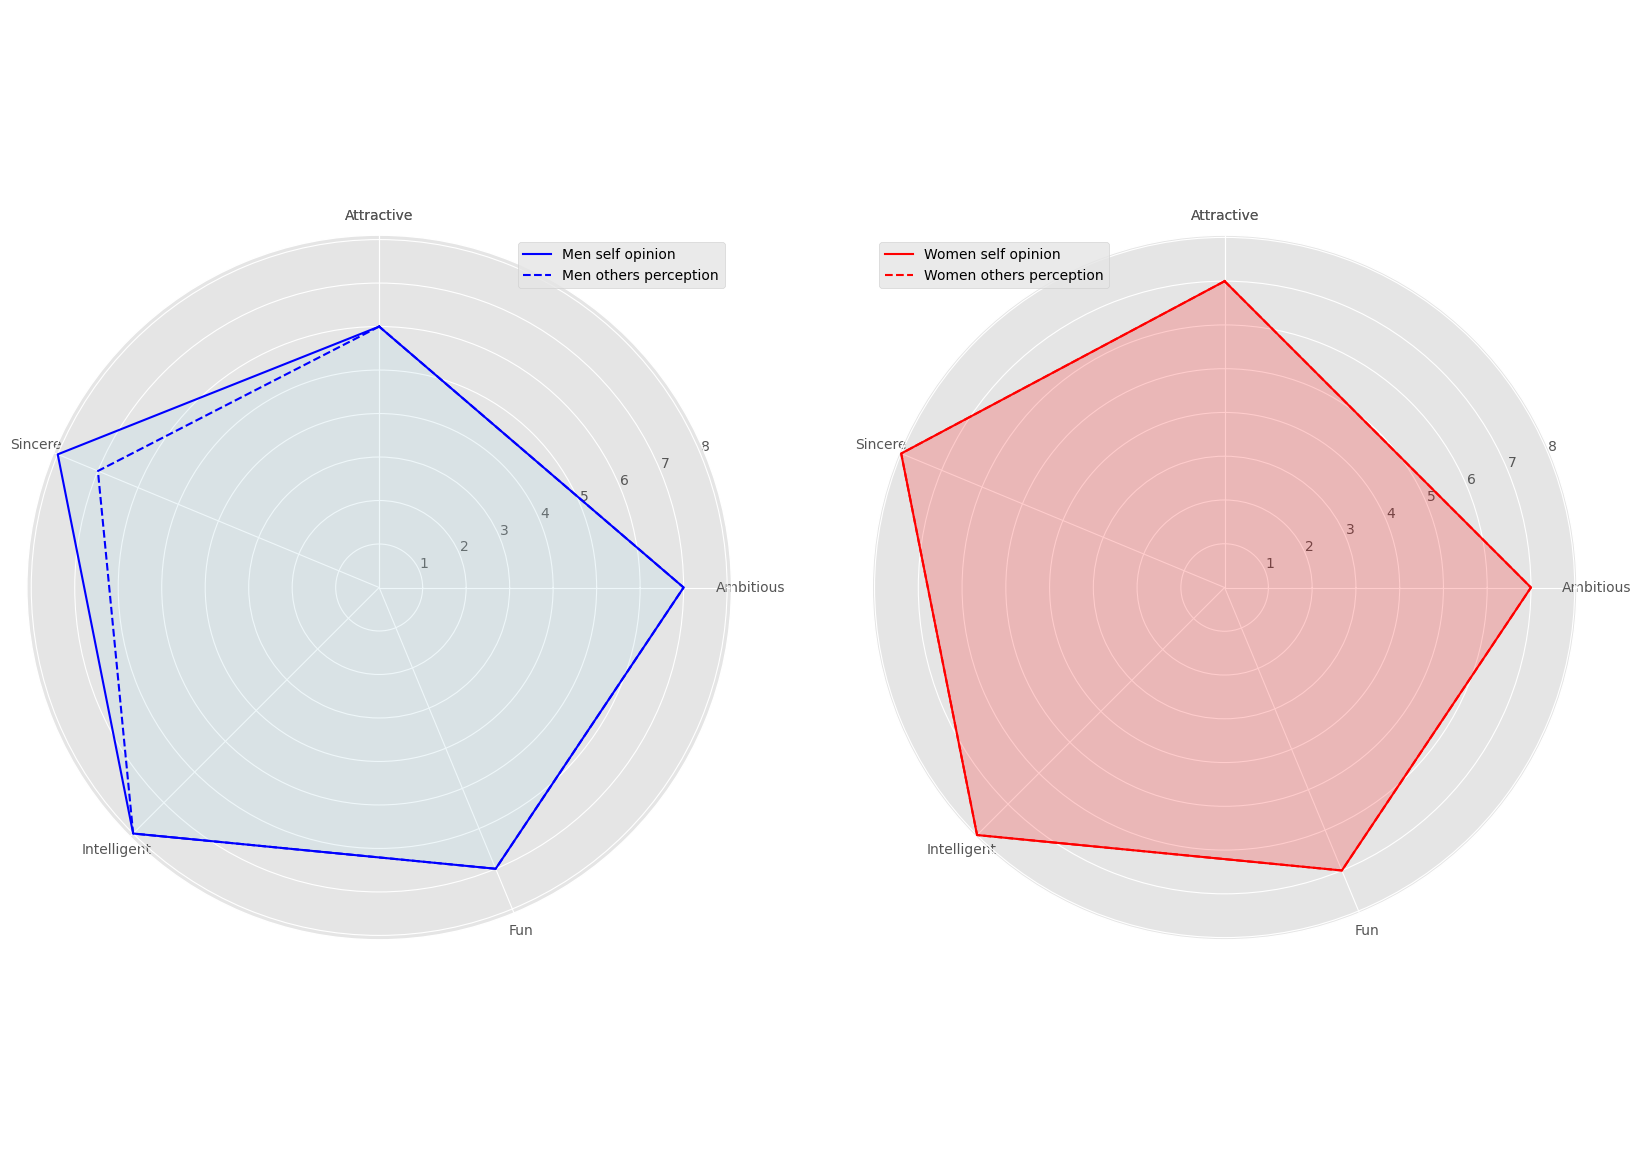

In [99]:
# Thetagrid
labels0 = ['Attractive' , 'Sincere', 'Intelligent' , 'Fun', 'Ambitious', 'Attractive']
label_pos = np.linspace(start=np.pi / 2, stop=2 * np.pi, num=5, endpoint=True)
label_pos = np.concatenate((label_pos, [label_pos[0]]))

fig, ax = plt.subplots(1,2, figsize=(20,15))
gs = GridSpec(1, 2)
ax[0].axis('off')
ax[0]= fig.add_subplot(gs[0,0], projection='polar')
ax[0].plot(label_pos, men_self_opinion, label='Men self opinion', color='blue')
ax[0].fill(label_pos, men_self_opinion, color='lightblue', alpha = 0.2)
ax[0].plot(label_pos, men_others_perception, label='Men others perception', color='blue', linestyle='dashed')
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=labels0)
plt.legend(loc='upper right')

ax[1].axis('off')
ax[1]= fig.add_subplot(gs[0,1], projection='polar')
ax[1].plot(label_pos, women_self_opinion, label='Women self opinion', color='red')
ax[1].fill(label_pos, women_self_opinion, color='red', alpha = 0.2)
ax[1].plot(label_pos, women_others_perception, label='Women others perception', color='red', linestyle='dashed')
lines, labels = plt.thetagrids(np.degrees(label_pos), labels=labels0)
plt.legend(loc='upper left')
plt.show()

### II. Match : what influences being matched or not ? (seaborn and plotly)

#### 0. Dataset reduction

In [123]:
#Columns to keep 
c2 = ['wave','id','gender', 'match', 'dec', 'dec_o', 'int_corr', "samerace",  "age", "age_o", 
 'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha',
 'attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','like_o', 'like', 'prob',
 'attr','sinc','intel','fun','amb','shar',
 'prob_o','met_o', 'goal']

d2 = data[c2]

m = d2['match'].value_counts(normalize=True)
print(f"Over the total of {d2.shape[0]} dates that happened,\n {round(m[1]*100)}% resulted in a match,\n {round(m[0]*100)}% did not result in a match.")


Over the total of 8378 dates that happened,
 16% resulted in a match,
 84% did not result in a match.


In [124]:
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [125]:
d2.columns

Index(['wave', 'id', 'gender', 'match', 'dec', 'dec_o', 'int_corr', 'samerace',
       'age', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'like', 'prob', 'attr', 'sinc', 'intel', 'fun',
       'amb', 'shar', 'prob_o', 'met_o', 'goal'],
      dtype='object')

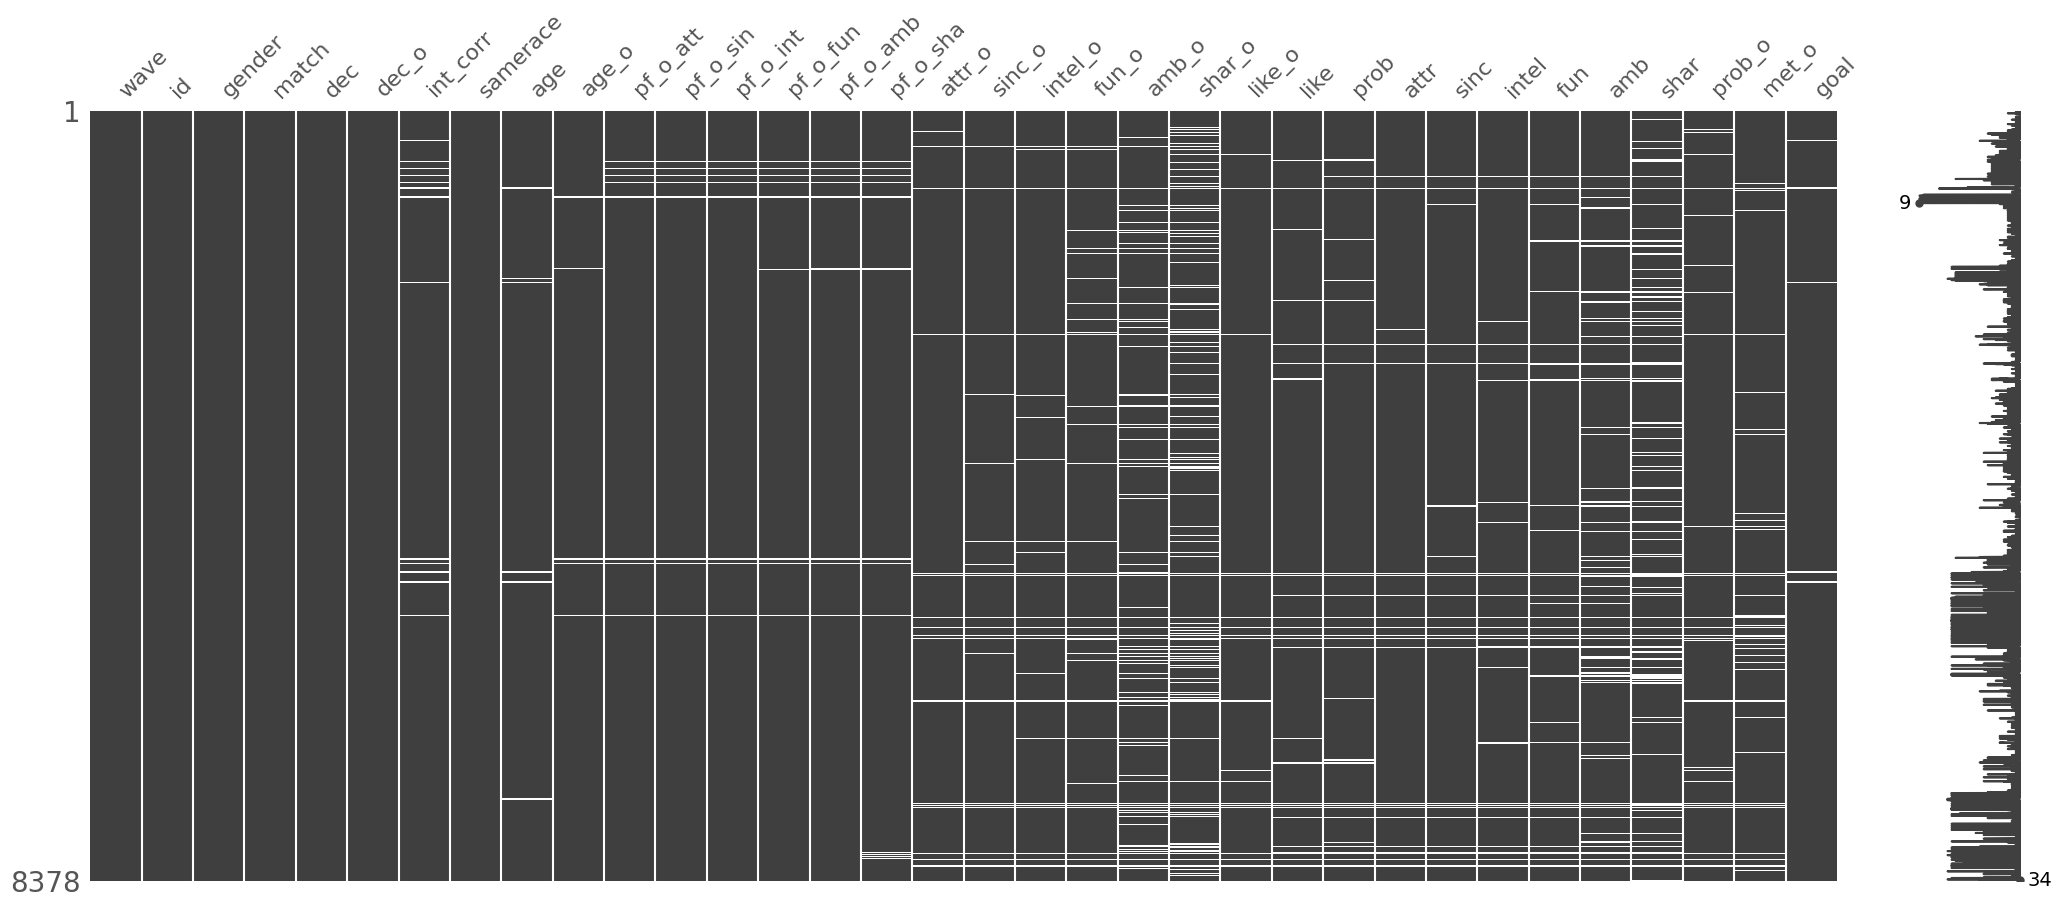

In [126]:
# Check missing values with a matrix visualization 
msno.matrix(d2)
plt.show()
#this missing values are sparse, so we won't treat them

#### What influences overall matches ?


The int-corr column designates the correlation between participant’s and partner’s ratings of interests before the date.

/var/folders/_r/hjf7yljs7t1_p3tmpc3lpwb80000gn/T/ipykernel_16213/802490279.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



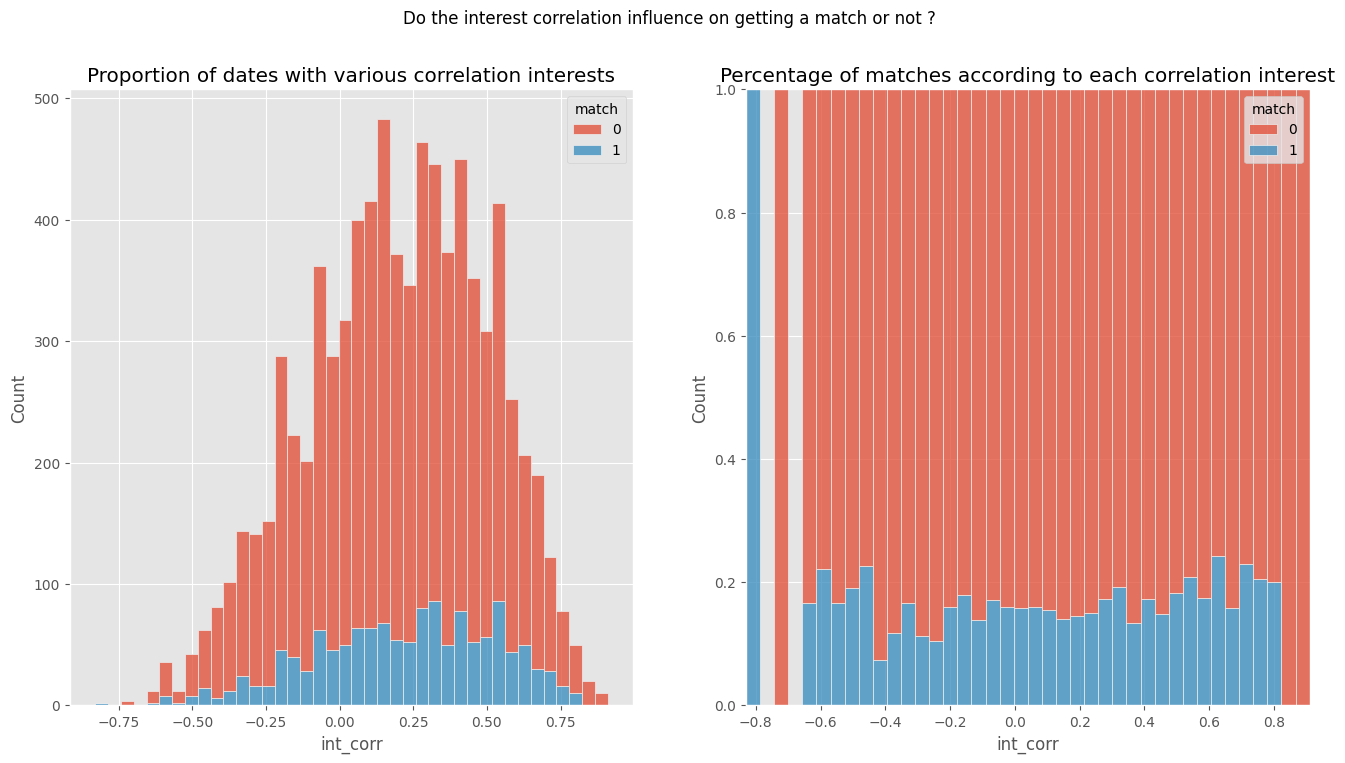

In [127]:
%matplotlib inline
fig, axes =plt.subplots(1,2, sharex = False, sharey = False, figsize=(16,8))
fig.suptitle('Do the interest correlation influence on getting a match or not ?')
sns.histplot(ax=axes[0], data = d2, x ='int_corr', hue = 'match', multiple = 'stack')
axes[0].set_title("Proportion of dates with various correlation interests")
sns.histplot(ax=axes[1], data = d2, x ='int_corr', hue = 'match', multiple = 'fill')
axes[1].set_title("Percentage of matches according to each correlation interest")
fig.show()


From these two graphs above, we can conclude that the correlation rate between common interests does not influence the chances of a match or not between two participants. This is a surprising conclusion, and lead us to more investigation on the various factors that impact matching. 

From these graphs above, it is possible to conclude that there is a better matching rate for people who have rated after the date that they like the person (column like_o - on a scale from 1 to 10). This is quite straightforward, considering the study. However, what is interesting to note is that there are more matches when the participant thinks the probability that the other one will say yes for them is high. This greatly influences the self-confidence of participants ! 
Finally, the primary goal of participants as to why they are participating in the study does not infuence matches greatly. 

In [217]:
fig = make_subplots(rows = 6, cols = 1)

attributes = ['sinc', 'attr', 'intel', 'fun', 'amb', 'shar']

for i, a in enumerate(attributes) :
    fig.add_trace(go.Scatter(name = "Rating by male subject of female partner", 
                        x = d2.loc[d2['gender'] == 1,:].groupby([a]).sum().loc[[0,1,2,3,4,5,6,7,8,9,10]].index, 
                        y = (d2.loc[d2['gender'] == 1,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 1,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100), 
                        line=dict(color='blue')),
                        row = i+1,
                        col = 1,
                        )
    fig.add_trace(go.Scatter(x=[d2.loc[d2['gender'] == 1,:].groupby([a]).sum().loc[[0,1,2,3,4,5,6,7,8,9,10]].index[-1]+0.1],showlegend=False, 
                             y=[(d2.loc[d2['gender'] == 1,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 1,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100)[-1]],
                             mode='text',
                             text=[round((d2.loc[d2['gender'] == 1,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 1,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100)[-1], 1)],
                             textposition='bottom right', textfont=dict(color="blue")),
                            row = i+1,
                            col = 1,
                            )

    fig.add_trace(go.Scatter(name = "Rating by female subject of male partner", 
                        x = d2.loc[d2['gender'] == 0,:].groupby([a]).sum().loc[[0,1,2,3,4,5,6,7,8,9,10]].index, 
                        y = (d2.loc[d2['gender'] == 0,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 0,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100), 
                        line=dict(color='red')),
                        row = i+1,
                        col = 1,
                        )
    fig.add_trace(go.Scatter(x=[d2.loc[d2['gender'] == 0,:].groupby([a]).sum().loc[[0,1,2,3,4,5,6,7,8,9,10]].index[-1]+0.1],
                             y=[(d2.loc[d2['gender'] == 0,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 0,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100)[-1]],
                             mode='text',
                             text=[round((d2.loc[d2['gender'] == 0,:].groupby([a]).sum()['match'].loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values/d2.loc[d2['gender'] == 0,:][a].value_counts().loc[[0,1,2,3,4,5,6,7,8,9,10]].sort_index().values *100)[-1], 1)],
                             textposition='middle right', textfont=dict(color="red")),
                            row = i+1,
                            col = 1,
                            )
    


fig.update_layout(
        height=1300, 
        width=1000,
        yaxis1_title = 'Match percentage',yaxis2_title = 'Match percentage',yaxis3_title = 'Match percentage',yaxis4_title = 'Match percentage',yaxis5_title = 'Match percentage',yaxis6_title = 'Match percentage',
        xaxis1_title = 'Rated Sincerity', xaxis2_title = 'Rated Attractiveness',xaxis3_title = 'Rated Intelligence',xaxis4_title = 'Rated Fun',xaxis5_title = 'Rated Ambition',xaxis6_title = 'Rated Sharing of interest',
        legend_title_text='Gender', 
        legend_tracegroupgap = 1000,
        title={
        'text': "Match percentage depending on the subject rating",
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)


names = set()
fig.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))

fig.show()


In the above graph, we observe the match percentage depending on the subjects ratings for the six different features (sincerity, attractiveness, intelligence, fun, ambition and shared interests).


Globally, the match percentage increases when the ratings increase. Between the features, here is the importance of the various features :
- for female subject giving a rating to male partner : share of interest (53.5%) > fun > attractiveness > sincerity > ambition > intelligence
- for male subjects giving rating to female date : share of interest > attractiveness > fun > sincerity > intelligence > ambition.

For women, it is interesting to note that sincerity and intelligence seems less important than declared compared to physical appearance, as the highest score on attractiveness (10/10) get a match 43% of the time versus 28% of the time for sinceritym or 25% for intelligence.

However, interestingly the most important attributes for both gender is personality based, as a high sharing interest got the highest match percentage (38% for men, and 54% for women), and the fun seems equally important that the attractiveness. 

We can also notice that being perceived as intelligent or ambitious does not seems to bring noticeably more matches. 